In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os
from glob import glob
from IPython.display import Image
import random
%matplotlib inline

In [2]:
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, '..', 'data')
CheXpert_train_hidden_features_all = np.load(os.path.join(DATA_DIR,'CheXpert_train_hidden_features_all.npy'))
CheXpert_train_labels_all = np.load(os.path.join(DATA_DIR,'CheXpert_train_labels_all.npy'))
CheXpert_valid_hidden_features_all = np.load(os.path.join(DATA_DIR,'CheXpert_valid_hidden_features_all.npy'))
CheXpert_valid_labels_all = np.load(os.path.join(DATA_DIR,'CheXpert_valid_labels_all.npy'))
extra_valid_age_sex_df = pd.read_csv(os.path.join(DATA_DIR,'extra_valid_age_sex.csv'))
extra_valid_hidden_features = np.load(os.path.join(DATA_DIR,'extra_valid_hidden_features.npy'))
extra_valid_labels = np.load(os.path.join(DATA_DIR,'extra_valid_labels.npy'))
extra_valid_images = glob(os.path.join(DATA_DIR, 'extraValid', '*'))

In [3]:
label_headers = ['Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'P. Effusion']
CheXpert_train_labels_all_df = pd.DataFrame(CheXpert_train_labels_all, columns=label_headers)
CheXpert_valid_labels_all_df = pd.DataFrame(CheXpert_valid_labels_all, columns=label_headers)
extra_valid_labels_df = pd.DataFrame(extra_valid_labels, columns=label_headers)

In [4]:
# ‘0’ for negative, ‘-1’ for uncertain, and ‘1’ for positive.
print(len(CheXpert_train_labels_all_df.loc[(CheXpert_train_labels_all_df != 0).any(axis=1)]))
print(CheXpert_train_hidden_features_all.shape)
print(CheXpert_valid_labels_all.shape)

165918
(223414, 1024)
(234, 5)


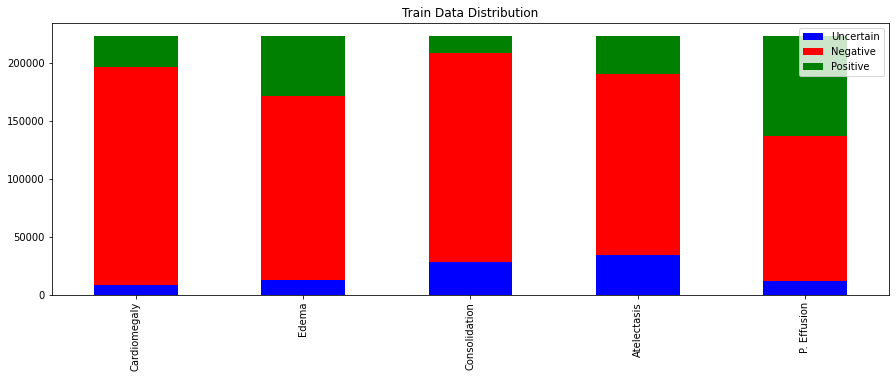

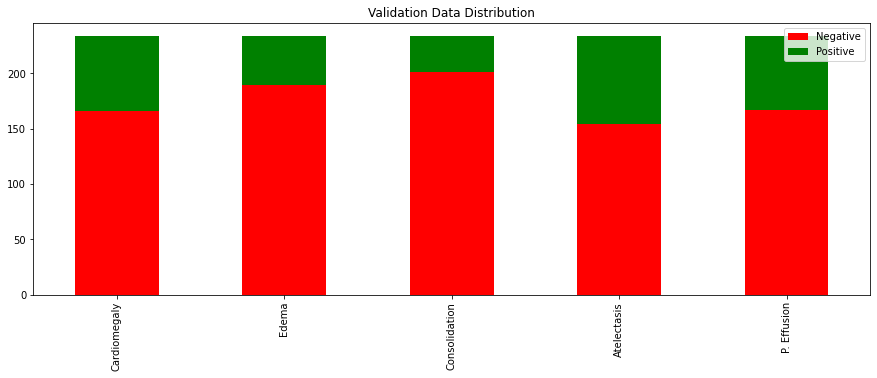

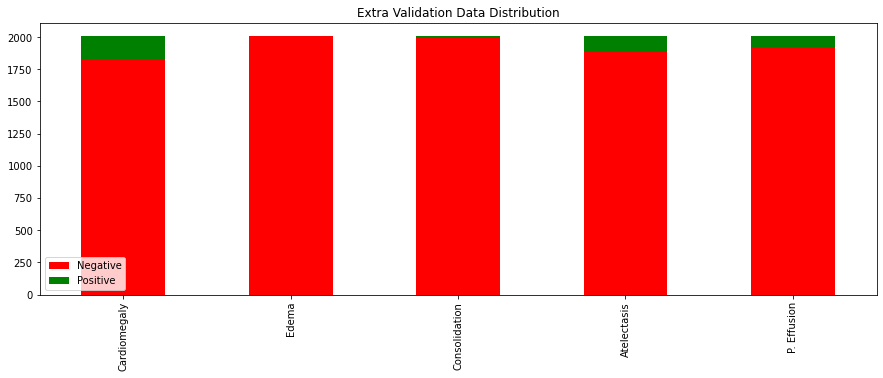

In [5]:
valid_bar = []
train_bar = []
extra_valid_bar = []
for header in label_headers:
    valid_bar.append(CheXpert_valid_labels_all_df[header].value_counts().sort_index().tolist())
    train_bar.append(CheXpert_train_labels_all_df[header].value_counts().sort_index().tolist())
    extra_valid_bar.append(extra_valid_labels_df[header].value_counts().sort_index().tolist())
    
train_bar_df = pd.DataFrame(data=train_bar, columns=['Uncertain', 'Negative', 'Positive'], index=label_headers)
train_bar_df.plot.bar(stacked=True, color=['blue', 'red', 'green'], figsize=(15,5))
plt.title('Train Data Distribution')

valid_bar_df = pd.DataFrame(data=valid_bar, columns=['Negative', 'Positive'], index=label_headers)
valid_bar_df.plot.bar(stacked=True, color=['red', 'green'], figsize=(15,5))
plt.title('Validation Data Distribution')

valid_bar_df = pd.DataFrame(data=extra_valid_bar, columns=['Negative', 'Positive'], index=label_headers)
valid_bar_df.plot.bar(stacked=True, color=['red', 'green'], figsize=(15,5))
plt.title('Extra Validation Data Distribution')
plt.show()

In [6]:
extra_valid_labels.shape

(2011, 5)

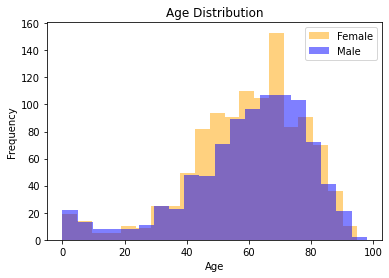

In [8]:
ax = extra_valid_age_sex_df.loc[extra_valid_age_sex_df['sex'] == 'F'].plot(kind='hist', color='orange', alpha=0.5, legend=False, bins=20)
extra_valid_age_sex_df.loc[extra_valid_age_sex_df['sex'] == 'M'].plot(kind='hist', color='blue', ax=ax, alpha=0.5, legend=False, bins=20)
ax.legend(['Female', 'Male'])
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

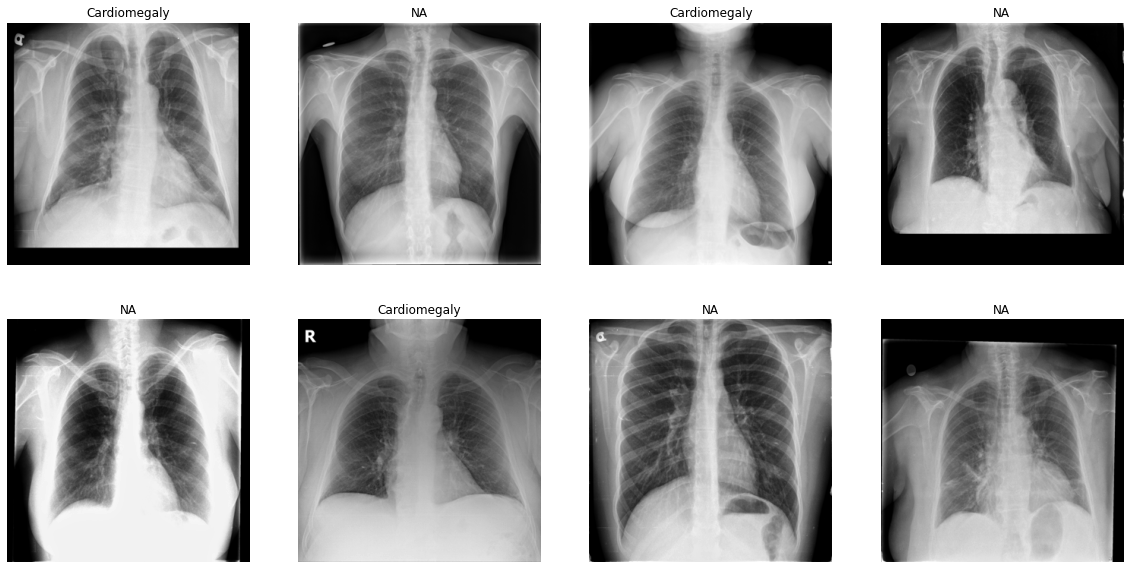

In [9]:
n = 8
plt.figure(figsize=(20,10))
for i in range(n):
    pick = random.randint(0,len(extra_valid_images))
    im = mpimg.imread(extra_valid_images[pick])
    label = extra_valid_labels_df.iloc[pick].idxmax()
    maxVal = extra_valid_labels_df.iloc[pick].max()
    if maxVal == 0:
        label = 'NA'
    plt.subplot(2,4,i+1)
    plt.imshow(im, cmap="gray")
    plt.axis('off')
    plt.title(label)
plt.show()

In [7]:
!pip install imgaug

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 948 kB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 62.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [10]:
from imgaug import augmenters as iaa
import imgaug as ia
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

Augmented:


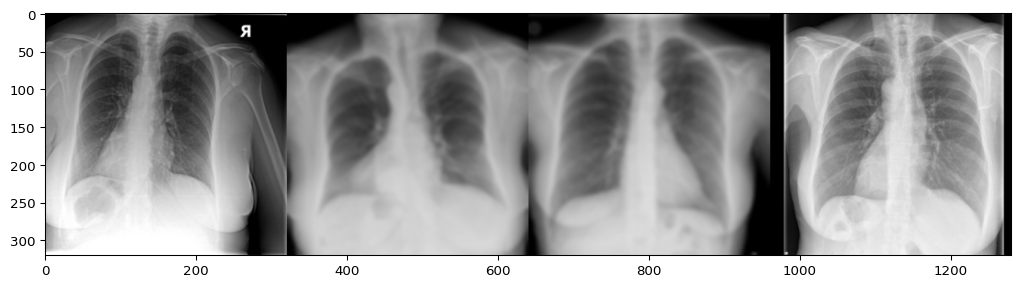

['/home/mhermon/hpchome/cs5430/chexpert/development/../data/extraValid/1271.png', '/home/mhermon/hpchome/cs5430/chexpert/development/../data/extraValid/455.png']
